In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import multivariate_normal as mvn
from scipy.stats import multinomial as mlvn
from scipy.stats import bernoulli as brn
%matplotlib inline

In [2]:
train_data = np.load('kmnist-train-imgs.npz')['arr_0']
train_labels = np.load('kmnist-train-labels.npz')['arr_0']
test_data = np.load('kmnist-test-imgs.npz')['arr_0']
test_labels = np.load('kmnist-test-labels.npz')['arr_0']

In [3]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
test_labels.shape

(60000, 28, 28)
(60000,)
(10000, 28, 28)


(10000,)

In [5]:
x_train = train_data.reshape(-1, 784)
y_train = train_labels
x_test = test_data.reshape(-1, 784)
y_test = test_labels

In [6]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test.shape

(60000, 784)
(60000,)
(10000, 784)


(10000,)

In [10]:
x_train[:,0].shape

(60000,)

In [19]:
x_train[:,-1].shape

(60000,)

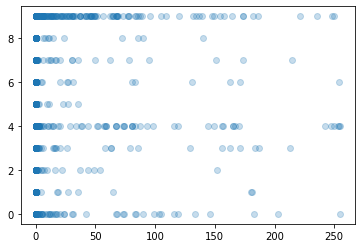

In [12]:
plt.figure()
plt.scatter(x_train[:,0], y_train,  alpha = 0.25)

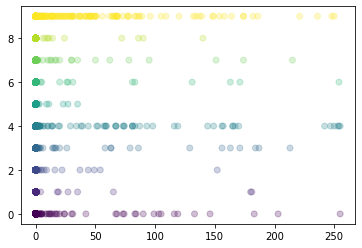

In [13]:
plt.figure()
plt.scatter(x_train[:,0], y_train,  c = y_train, alpha = 0.25)

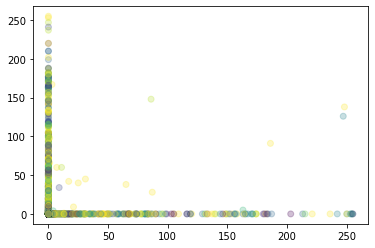

In [21]:
plt.figure()
plt.scatter(x_train[:,0], x_train[:,-1], c=y_train,  alpha = 0.25)

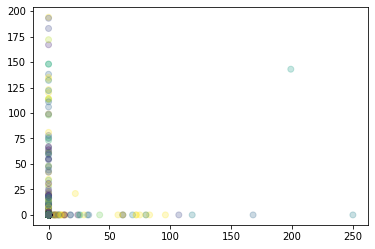

In [22]:
plt.figure()
plt.scatter(x_test[:,0], x_test[:,-1], c=y_test,  alpha = 0.25)

In [25]:
norm_train = train_data / np.linalg.norm(train_data)
norm_train_labels = train_labels / np.linalg.norm(train_labels)
norm_test = test_data / np.linalg.norm(test_data)
norm_test_labels = test_labels / np.linalg.norm(test_labels)


In [29]:
ntrain = norm_train.reshape(-1, 784)
ntest = norm_test.reshape(-1, 784)

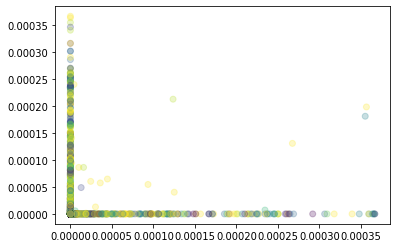

In [30]:
plt.figure()
plt.scatter(ntrain[:,0], ntrain[:,-1], c=norm_train_labels,  alpha = 0.25)

In [46]:
import numpy as np
import pandas as pd
from collections import Counter

class knn:
    
    # Intializing k 
    def __init__(self,k = 10):
        self.k = k
        print("Initalized k with :",k)
        
    # Finding distance between 2 data points to find the similarity
    def euclidDistance(self , x1, x2):
        return (np.sqrt(np.sum(np.square(x1 - x2))))
    
    #Finding nearest neighbors
    def predict(self, trainData, labels , testPoint):
        distances = {}
        
        # calculating distance of data point from each point in dataset
        for i in range(len(trainData)):
            distances[i] = self.euclidDistance(trainData.iloc[i] , testPoint)
        
        # selecting the "k" nearest points
        neighbors = sorted(distances.items(), key = lambda kv:(kv[1], kv[0]))[:self.k]
        neighborLabels = []
        
        # getting labels of the "k" nearest points
        for neigh in neighbors:
            neighborLabels.append(labels[neigh[0]])
        
        outputClass = Counter(neighborLabels)
        print("The given data point belongs to :",max(outputClass))

In [32]:
model = knn(10)

Initalized k with : 10


In [33]:
x_train.shape

(60000, 784)

In [35]:
x_train[:,0].shape

(60000,)

In [41]:
x_train[:,0][1]

0

In [37]:
fea = x_train[:, 0]
tar = y_train

In [36]:
y_train.shape

(60000,)

In [51]:
df = pd.DataFrame(image)
#df
df.shape

(28, 28)

In [49]:
type(image)

numpy.ndarray

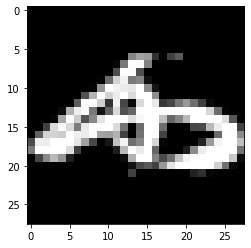

In [42]:
sample = 1
image = train_data[sample]
# plot the sample
fig = plt.figure
plt.imshow(image, cmap='gray')
plt.show()

In [52]:
model.predict(fea, tar, df )

AttributeError: 'numpy.ndarray' object has no attribute 'iloc'

In [53]:
# kNN with neighbors=4 benchmark for Kuzushiji-MNIST
# Acheives 92.10% test accuracy

from sklearn.neighbors import KNeighborsClassifier
import numpy as np



clf = KNeighborsClassifier(n_neighbors=4, weights='distance', n_jobs=-1)
print('Fitting', clf)
clf.fit(x_train, y_train)
print('Evaluating', clf)

test_score = clf.score(x_test, y_test)
print('Test accuracy:', test_score)

Fitting KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
Evaluating KNeighborsClassifier(n_jobs=-1, n_neighbors=4, weights='distance')
Test accuracy: 0.921


In [55]:
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(x_train, 2, mode='connectivity', include_self=True)
A

<60000x60000 sparse matrix of type '<class 'numpy.float64'>'
	with 120000 stored elements in Compressed Sparse Row format>

In [ ]:
import numpy as np 
i

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.stats import multivariate_normal as mvn
from scipy.stats import multinomial as mlvn
from scipy.stats import bernoulli as brn
%matplotlib inline

In [56]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
y_test

(60000, 784)
(60000,)
(10000, 784)


array([2, 9, 3, ..., 9, 4, 2], dtype=uint8)

In [67]:
import numpy as np
import matplotlib.pyplot as plt
import operator
#import scipy
from scipy.special import expit
%matplotlib inline

In [68]:
def euclidean_distance(vector1, vector2):
    return np.sqrt(np.sum(np.power(vector1-vector2, 2)))
def absolute_distance(vector1, vector2):
    return np.sum(np.absolute(vector1-vector2))

In [69]:
def get_neighbours(X_train, X_test_instance, k):
    distances = []
    neighbors = []
    for i in range(0, X_train.shape[0]):
        dist = absolute_distance(X_train[i], X_test_instance)
        distances.append((i, dist))
    distances.sort(key=operator.itemgetter(1))
    for x in range(k):
        #print distances[x]
        neighbors.append(distances[x][0])
    return neighbors

def predictkNNClass(output, y_train):
    classVotes = {}
    for i in range(len(output)):
#         print output[i], y_train[output[i]]
        if y_train[output[i]] in classVotes:
            classVotes[y_train[output[i]]] += 1
        else:
            classVotes[y_train[output[i]]] = 1
    sortedVotes = sorted(classVotes.iteritems(), key=operator.itemgetter(1), reverse=True)
    #print sortedVotes
    return sortedVotes[0][0]

In [71]:
def kNN_test(X_train, X_test, Y_train, Y_test, k):
    output_classes = []
    for i in range(0, X_test.shape[0]):
        output = get_neighbours(X_train, X_test[i], k)
        predictedClass = predictkNNClass(output, Y_train)
        output_classes.append(predictedClass)
    return output_classes

In [72]:
def prediction_accuracy(predicted_labels, original_labels):
    count = 0
    for i in range(len(predicted_labels)):
        if predicted_labels[i] == original_labels[i]:
            count += 1
    #print count, len(predicted_labels)
    return float(count)/len(predicted_labels)

In [95]:
final_accuracies

{}

In [73]:
plt.figure(figsize=(15, 6))
plt.plot(final_accuracies.keys(), final_accuracies.values())
plt.ylim([0, 1])
plt.xticks(final_accuracies.keys())
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.title("Plot of the prediction accuracy of KNN Classifier as a function of k (Number of Neighbours), rescaled Y")
plt.show()

TypeError: len() of unsized object

TypeError: len() of unsized object

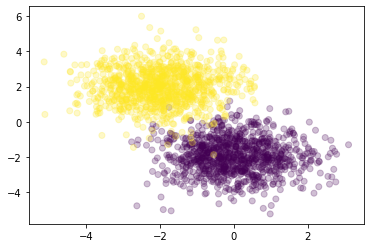

In [76]:
D=2
C=2
N=int(C*1e3)

X1 = np.random.randn((N//C),D) +np.array([0, -2])
X2 = np.random.randn((N//C),D) + np.array([-2, 2])
X = np.vstack((X1, X2))

y = np.array([0]*(N//C) + [1]*(N//C))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, alpha=.25) 


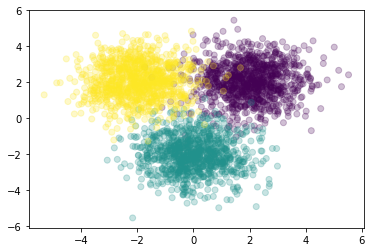

In [88]:
D=2
C=2
N=int(C*1e3)

X0 = np.random.randn((N//C),D) + np.array([2, 2])
X1 = np.random.randn((N//C),D) +np.array([0, -2])
X2 = np.random.randn((N//C),D) + np.array([-2, 2])
X = np.vstack((X0, X1, X2))

y = np.array(([0]*(N//C)) + ([1]*(N//C)) + ([2]*(N//C)))

plt.figure()
plt.scatter(X[:,0], X[:,1], c=y, alpha=.25) 


In [89]:
DataSet = pd.DataFrame(X)
Yset = pd.DataFrame(y)


In [90]:
DataSet[2]=Yset

In [93]:
DataSet.head()

,0,1,2
0,1.638589,2.669670,0
1,1.182860,2.637275,0
2,1.498239,3.018769,0
3,3.991157,0.105504,0
4,3.375748,0.303981,0


In [94]:
DataSet.to_csv("TrippleGauss.csv")

In [ ]:
class KNNClassifier():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon=1e-3):
        N= len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1/(np.sqrt(dist[idxt])+epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
            
            
            
            
            
        
    

In [96]:
def plot_image(img):
    plt.imshow(img.reshape(28, 28), cmap="gray")
    plt.show()

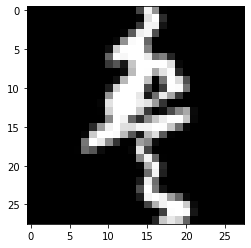

In [98]:
plot_image(x_train[19])

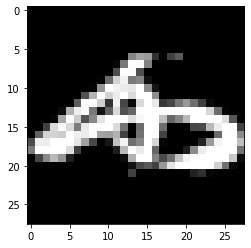

In [99]:
plot_image(x_train[1])

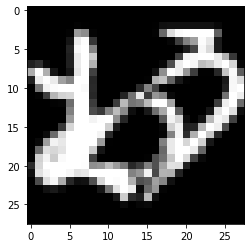

In [100]:
plot_image(x_train[2])

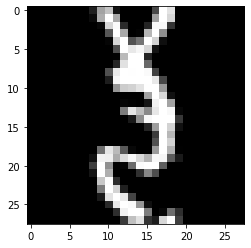

In [101]:
plot_image(x_train[3])

In [ ]:
b

In [107]:
def distance(pA, pB):
    return np.sum((pA - pB)**2)**0.5

In [108]:
def kNN(X, y, x_query, k=5):
    """
    X -> (100, 2)
    y -> (100, 1)
    x_query -> (1,2)
    k -> scalar
    """
    
    m = X.shape[0]
    distances = []
    
    for i in range(m):
        dis = distance(x_query, X[i])
        distances.append((dis, y[i]))
    
    distances = sorted(distances)
    distances = distances[:k]
    
    distances = np.array(distances)
    labels = distances[:,1]
    
    uniq_label, counts = np.unique(labels, return_counts=True)    
    pred = uniq_label[counts.argmax()]
    
    return int(pred)

In [109]:

kNN(x_train, y_train, x_test[234], k=7)

5

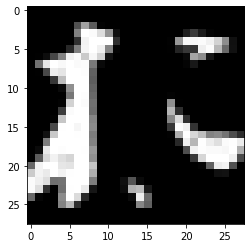

In [111]:

plot_image(x_test[234])

In [148]:
df_mapping =  pd.read_csv('kmnist_classmap.csv')

In [149]:
df_mapping

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [150]:
df_mapping['char'][0]

'お'

str

In [126]:
x_train.shape

(60000, 784)

In [129]:
x_train[:,0].shape
# should learn that better please :)

(60000,)

In [125]:
y_train.shape

(60000,)

In [ ]:
import numpy as np
import pandas as pd
x = np.random.randn(5)
y = np.sin(x)
df = pd.DataFrame({'x':x, 'y':y})
df.plot('x', 'y', kind='scatter')

In [130]:
#new_array = np.stack(x_train, y_train)
#new_array

df = pd.DataFrame({'train':x_train[:,0], 'label':y_train})

In [160]:
df_mapping

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [162]:
df_labels

,index
0,8
1,7
2,0
3,1
4,4
...,...
59995,4
59996,9
59997,0
59998,4


In [156]:
#new_array = np.stack(x_train, y_train)
#new_array

df_labels = pd.DataFrame({'index':y_train})

In [158]:
#new_array = np.stack(x_train, y_train)
#new_array

df_label_mapping = pd.merge(df_mapping,df_labels, how = 'left', on='index')

In [167]:
df_label_mapping.iloc[304]

index             0
codepoint    U+304A
char              お
Name: 304, dtype: object

In [169]:
df_lm = df_label_mapping 

In [172]:
df_lm['index'].value_counts()

0    6000
1    6000
2    6000
3    6000
4    6000
5    6000
6    6000
7    6000
8    6000
9    6000
Name: index, dtype: int64

In [173]:
df_lm['index'].nunique()

10

In [174]:
df_lm.describe()

,index
count,60000.000000
mean,4.500000
std,2.872305
min,0.000000
25%,2.000000
50%,4.500000
75%,7.000000
max,9.000000


In [152]:
df_mapping

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な
5,5,U+306F,は
6,6,U+307E,ま
7,7,U+3084,や
8,8,U+308C,れ
9,9,U+3092,を


In [155]:
df_labels

,label
0,8
1,7
2,0
3,1
4,4
...,...
59995,4
59996,9
59997,0
59998,4


In [157]:
df_labels

,index
0,8
1,7
2,0
3,1
4,4
...,...
59995,4
59996,9
59997,0
59998,4


In [ ]:
giving it one class so its not avialble to another inverse of the distance as our distance

In [143]:
class KNNClassifier():
    
    def fit(self, X, y):
        self.X = X
        self.y = y
    
    def predict(self, X, K, epsilon=1e-3):
        N= len(X)
        y_hat = np.zeros(N)
        
        for i in range(N):
            dist2=np.sum((self.X-X[i])**2, axis=1)
            idxt = np.argsort(dist2)[:K]
            gamma_k = 1/(np.sqrt(dist2[idxt])+epsilon)
            y_hat[i] = np.bincount(self.y[idxt], weights=gamma_k).argmax()
            
        return y_hat
            
            
            
            
            
            
        
    

In [138]:
def main():
    D=2
    C=2
    N=int(C*1e3)

    X0 = np.random.randn((N//C),D) + np.array([2, 2])
    X1 = np.random.randn((N//C),D) +np.array([0, -2])
    X2 = np.random.randn((N//C),D) + np.array([-2, 2])
    X = np.vstack((X0, X1, X2))

    y = np.array(([0]*(N//C)) + ([1]*(N//C)) + ([2]*(N//C)))

    knnInstance = KNNClassifier()
    knnInstance.fit(X,y)
    
    X_vis=np.random.uniform(-6,6, (int(N*10),D))
    y_hat_vis = knnInstance.predict(X_vis, 150)
    
    
    
   
    
    

NameError: name 'X_vis' is not defined

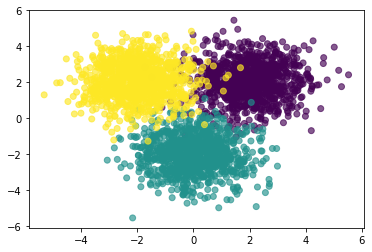

In [139]:
 
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, alpha=.65)
    plt.scatter(X_vis[:,0], X_vis[:, 1], c = y , alpha = .01)
    

In [146]:
 def main():
    D=2
    C=2
    N=int(C*1e3)

    X0 = np.random.randn((N//C),D) + np.array([2, 2])
    X1 = np.random.randn((N//C),D) +np.array([0, -2])
    X2 = np.random.randn((N//C),D) + np.array([-2, 2])
    X = np.vstack((X0, X1, X2))

    y = np.array(([0]*(N//C)) + ([1]*(N//C)) + ([2]*(N//C)))

    knnInstance = KNNClassifier()
    knnInstance.fit(X,y)
    
    X_vis=np.random.uniform(-6,6, (int(N*10),D))
    y_hat_vis = knnInstance.predict(X_vis, 150)
    
    

    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, alpha=.65)
    plt.scatter(X_vis[:,0], X_vis[:, 1], c = y_hat_vis , alpha = .01)

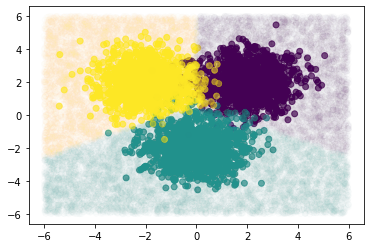

In [147]:
if __name__=="__main__":
    main()

In [175]:
np.bincount([1, 1, 0, 0 ], weights = [.7, .6, .2 , .1])

array([0.3, 1.3])

In [176]:
 def main():
    D=2
    C=2
    N=int(C*1e3)

    X0 = np.random.randn((N//C),D) + np.array([2, 2])
    X1 = np.random.randn((N//C),D) +np.array([0, -2])
    X2 = np.random.randn((N//C),D) + np.array([-2, 2])
    X = np.vstack((X0, X1, X2))

    y = np.array(([0]*(N//C)) + ([1]*(N//C)) + ([2]*(N//C)))

    knnInstance = KNNClassifier()
    knnInstance.fit(X,y)
    
    X_vis=np.random.uniform(-6,6, (int(N*10),D))
    y_hat_vis = knnInstance.predict(X_vis, 15)
    
    

    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, alpha=.65)
    plt.scatter(X_vis[:,0], X_vis[:, 1], c = y_hat_vis , alpha = .01)

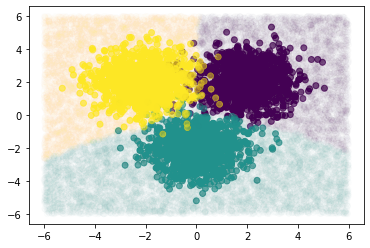

In [177]:
if __name__=="__main__":
    main()

In [178]:
 def main():
    D=2
    C=2
    N=int(C*1e3)

    X0 = np.random.randn((N//C),D) + np.array([2, 2])
    X1 = np.random.randn((N//C),D) +np.array([0, -2])
    X2 = np.random.randn((N//C),D) + np.array([-2, 2])
    X = np.vstack((X0, X1, X2))

    y = np.array(([0]*(N//C)) + ([1]*(N//C)) + ([2]*(N//C)))

    knnInstance = KNNClassifier()
    knnInstance.fit(X,y)
    
    X_vis=np.random.uniform(-6,6, (int(N*10),D))
    y_hat_vis = knnInstance.predict(X_vis, 250)
    
    

    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, alpha=.65)
    plt.scatter(X_vis[:,0], X_vis[:, 1], c = y_hat_vis , alpha = .01)

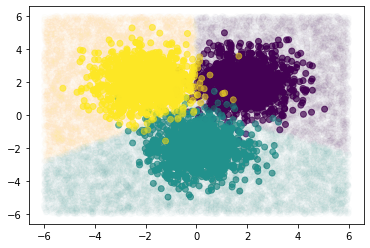

In [179]:
if __name__=="__main__":
    main()

In [ ]:
 def main():
    D=2
    C=2
    N=int(C*1e3)

    X0 = np.random.randn((N//C),D) + np.array([2, 2])
    X1 = np.random.randn((N//C),D) +np.array([0, -2])
    X2 = np.random.randn((N//C),D) + np.array([-2, 2])
    X = np.vstack((X0, X1, X2))

    y = np.array(([0]*(N//C)) + ([1]*(N//C)) + ([2]*(N//C)))

    knnInstance = KNNClassifier()
    knnInstance.fit(X,y)
    
    X_vis=np.random.uniform(-6,6, (int(N*10),D))
    y_hat_vis = knnInstance.predict(X_vis, 250)
    
    

    
    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, alpha=.65)
    plt.scatter(X_vis[:,0], X_vis[:, 1], c = y_hat_vis , alpha = .01)